# tf.keras를 이용한 패션 MNIST 분석

### 1. 모듈 import

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


### 2. 패션 MNIST 데이터셋 임포트

- 28X28 해상도의 의퓨 품목 이미지
- 60,000개의 훈련셋과 10,000개의 평가셋으로 구분되어 있음

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


---
- 데이터셋 구성
    - train_images: 학습용 이미지
    - train_labels: 학습용 라벨
    - test_images: 평가용 이미지
    - test_labels: 평가용 라벨
- 이미지는 28X28 사이즈의 넘파이 배열이며 픽셀은 0~255의 정수 값
- 라벨은 0~9의 정수 값

<table width='100%'>
  <tr>
    <th width='10%'>레이블</th>
    <th width='90%'>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

---

- 출력용 변수 생성

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

### 데이터 전처리
- 이미지를 보면 사이즈는 28X28, 픽셀 값은 0~255 범위에 있음을 알 수 있다.

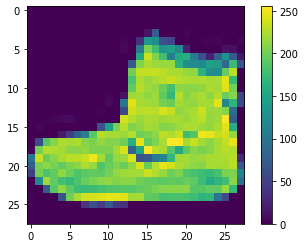

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

- 신경망에 주입하기 전에 정수형의 픽셀 값을 255로 나누어 0~1 사이의 실수형으로 변환
- 훈련셋과 테스트셋 모두 적용해야 한다.

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

- 변환된 값 확인

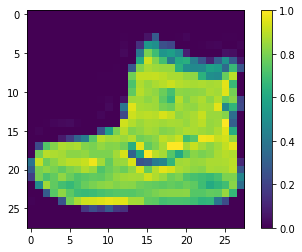

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

- 훈련세트 이미지 확인, 처음 25개의 이미지와 라벨을 확인

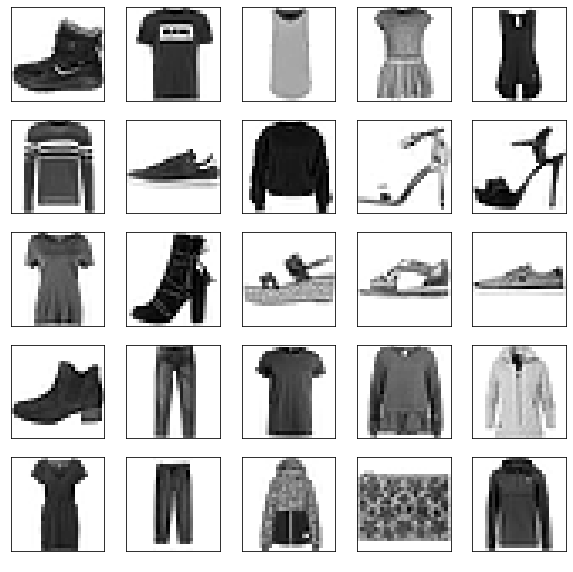

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='white')
plt.show()

### 모델 구성

#### 층 설정
- 신경망의 기본 빌딩 블록은 **레이어**이다.
- 레이어는 입력 값으로부터 표현을 추출하며, 추출된 표현은 문제 해결에 의미가 있어야 한다.

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Metal device set to: Apple M1


2022-01-27 08:22:07.935411: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-27 08:22:07.935878: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


- tf.keras.layers.Flatten: 28X28 형태의 2차원 배열을 784의 1차원 배열로 변환한다. 가중치에 대한 학습은 없다.
- tf.keras.layers.Dense: 완전 연결 층(밀집 연결 층)
    - 첫 번째 Dense 층은 128개의 뉴런을 가지며 활성화 함수로 relu를 사용한다.
    - 두 번째 Dense 층은 최종 출력 층으로 데이터셋의 라벨 개수와 똑같은 10개의 뉴런을 가지며 10개의 출력값 총합은 1이고 이 중 가장 높은 값의 인덱스가 라벨로 선택된다.

> 이미 앞에서 특성 값인 픽셀을 0\~1 사이의 실수로 바꾸었고 마지막 계층의 Dense는 activation을 지정하지 않았으므로 입력값을 그대로 출력한다.
> 결국 마지막 Dense의 출력 값은 activation을 softmax로 지정하지 않았지만 0~1 사이의 실수이므로 softmax 계층이라 할 수 있다. 

---

#### 모델 컴파일
- 모델을 훈련하기 전 추가 설정
    - 손실 함수: 훈련 중 모델이 얼마나 정확한지 측정, 이 함수의 결괏값이 최소여야 한다.
    - 옵티마이저: 모델이 예측한 결과와 손실 함수를 기반으로 모델을 업데이트 하는 설정
    - 메트릭: 훈련 및 테스트 단계를 모니터링, 이 예에서는 정확도를 사용함

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 모델 훈련

- 다음 단계에 따라 훈련
    - 훈련 데이터를 모델에 주입
    - 모델이 이미지와 라벨을 매핑하는 방법을 학습
    - 테스트셋에 대한 모델의 예측 생성
    - 예측이 테스트셋의 라벨과 일치하는지 확인
    
#### 모델 Feed

In [19]:
model.fit(train_images, train_labels, epochs=10)

2022-01-27 09:38:38.447649: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-27 09:38:38.591278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4979 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3761 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3380 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3145 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2966 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2704 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2469 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.237

- 평균 정확도: 0.88615

#### 정확도 평가

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2022-01-27 09:41:10.973807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3469 - accuracy: 0.8781 - 890ms/epoch - 3ms/step

Test accuracy: 0.8781000375747681


#### 예측하기
- 훈련된 모델을 이용하여 특정 이미지 예측

In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

2022-01-27 10:14:27.210574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([2.8515942e-07, 2.6601246e-08, 1.1572170e-06, 4.3768438e-07,
       7.8622571e-07, 1.4470210e-02, 1.7706490e-06, 3.0009001e-02,
       1.0123244e-06, 9.5551538e-01], dtype=float32)

- 가장 높은 신뢰도를 가진 레이블을 확인

In [23]:
np.argmax(predictions[0])

9

- 실제 값 확인

In [24]:
test_labels[0]

9

- 10개의 클래스에 대한 예측을 모두 그래프로 표현

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### 예측 확인

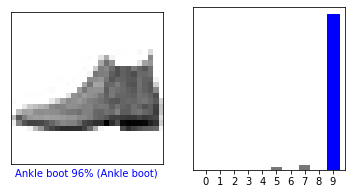

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

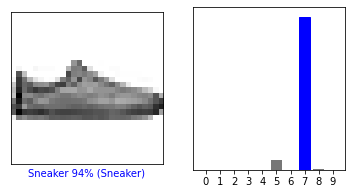

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

- 위 이미지의 경우 TF 홈페이지 상에는 틀린 값으로 나오는데 여기서는 맞았음...-.-

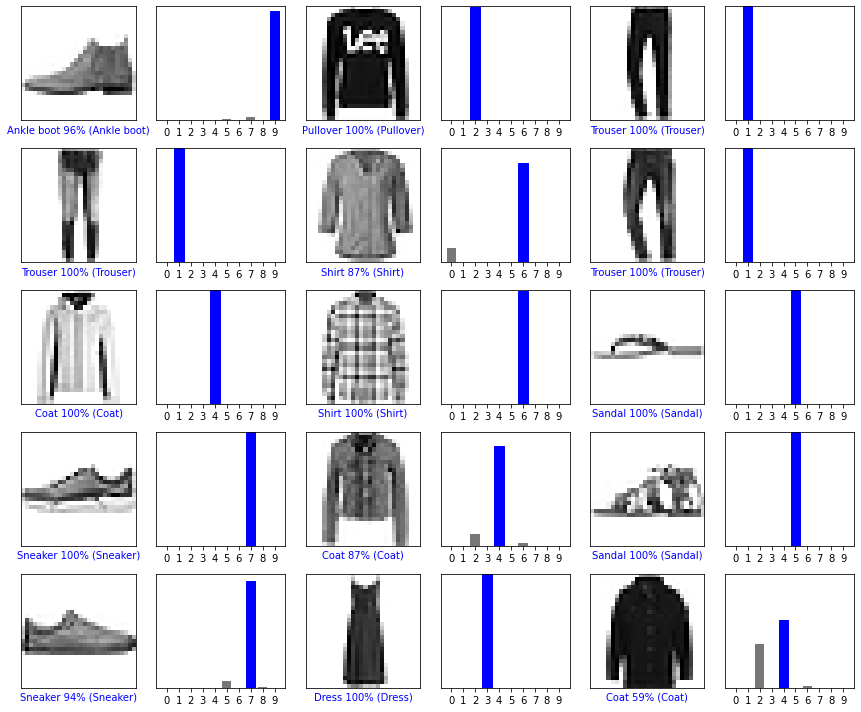

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 훈련된 모델 사용하기

In [29]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


- tf.keras 모델은 배치 처리에 최적화 되어 있어 하나의 이미지를 예측하더라도 배치 사이즈 차원을 추가해야 함

In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


- 이미지 예측 생성

In [31]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.2046589e-06 5.1707448e-14 9.9771702e-01 1.8225449e-09 1.9355903e-03
  2.0629181e-13 3.4425358e-04 1.8666844e-18 2.9836904e-09 1.5829692e-13]]


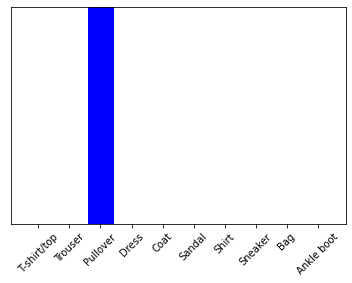

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

- 배치로 돌렸기 때문에 결과가 2차원 배열로 출력된다.

In [33]:
np.argmax(predictions_single[0])

2